<a href="https://colab.research.google.com/github/BrandPM18/Artificial-Intelligence/blob/master/Algoritmo_Desenso_Grad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Librerias Necesarias

import numpy as np
import matplotlib.pyplot as plt 

## Funcion a Analizar

$z = (x^2+y-11)^2+(x+y^2-7)^2$

Link_graph: [Desmos](https://www.desmos.com/calculator/ylcvjgovnt)

Reference:
- http://www.benfrederickson.com/numerical-optimization/


$\theta:\ \ (\theta_0^2+\theta_1-11)^2+(\theta_0+\theta_1^2-7)^2$


In [0]:
# Para definir esta funcion usamos a funcion Lambda

F_cost = lambda th: (th[0]**2 + th[1] -11)**2 +(th[0]+th[1]**2 - 7)**2

# La funcion tendra como parametros de entrada un arreglo [x,y]

In [0]:
F_cost([2,3])

32

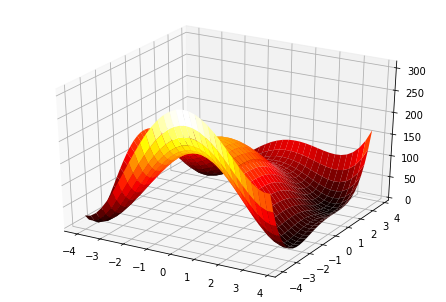

In [0]:
# De forma ilustrativa, graficaremos la funcion en 3D


from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()

ax = Axes3D(fig)

# Se asignara puntos por cada 0.25 entre el intervalo de [-4,4] en los X y Y

X = np.arange(-4,4,0.25) 
Y = np.arange(-4,4,0.25)
X,Y = np.meshgrid(X,Y)

#Plotearemos un mapa de calor indicando la profundidad 

ax.plot_surface(X,Y,F_cost([X,Y]),rstride =1 ,cstride =1 ,cmap = 'hot')

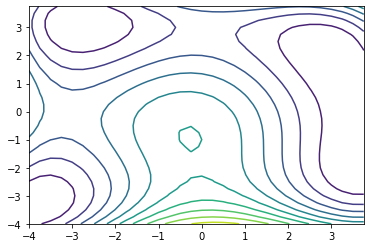

In [0]:
# En una percepctiva bidimensional, podemos ver líneas de contorno.

plt.contour(X,Y,F_cost([X,Y]),10)

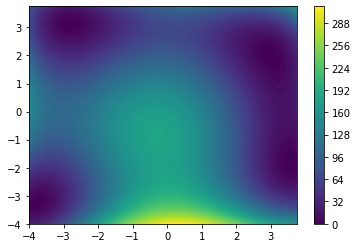

In [0]:
# Ahora lo visualizarems los contornos rellenos para ver las profundidades.

plt.contourf(X,Y,F_cost([X,Y]),100)

plt.colorbar() # indica una tabla de calor.

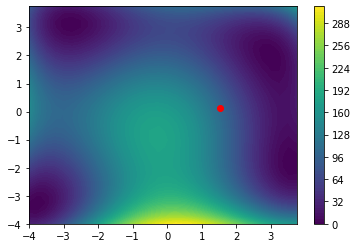

In [0]:
# Definimos un theta aleatorio el cual definira un arreglo [x,y] 

Theta = np.random.rand(2) * 4 - 2      

# grafica de la funcion
plt.contourf(X,Y,F_cost([X,Y]),100)
plt.colorbar()

plt.plot(Theta[0],Theta[1],"o",c="red") #ploteamos en punto en la grafica


plt.show()

 
## Maximos y Minimos
En cualquier funcion existian puntos donde la cantidad de _salida_ $f(x)$ sea minima o maxima.
Estos puntos deben cumplir las siguentes condiciones:
- Dada una funcion suficiente y diferenciable $f: A \subset \mathbb{R}^n \rightarrow \mathbb{R} $
- A estos puntos donde su __primera derivada__ es nula. ($f'=0$)

### Maximos:
De ser un maximo se tendra que:
- *__Local__*: Sea la funcion en el punto $P = (x_o,f(x_o))$ un maximo local $\Leftrightarrow$ existe un *__"entorno reducido"__* donde $f(x)\leq f(x_o)$
- *__Global__*: Sea un punto $P=(x_o,f(x_o))$  __máximo absoluto o global__ de $f \Leftrightarrow \forall x \neq x_o,x\in A,f(x_o)\geq f(x)$.

### Maximos:
De ser un maximo se tendra que:
- *__Local__*: Sea la funcion en el punto $P = (x_o,f(x_o))$ un maximo local $\Leftrightarrow$ existe un *__"entorno reducido"__* donde $f(x)\geq f(x_o)$
- *__Global__*: Sea un punto $P=(x_o,f(x_o))$  __máximo absoluto o global__ de $f \Leftrightarrow \forall x \neq x_o,x\in A,f(x_o)\leq f(x)$.

<img src='https://upload.wikimedia.org/wikipedia/commons/e/e3/Non-Convex_Objective_Function.gif'/>

## Desenso de Gradiente
Es el algoritmo que permine buscar un minimo en una funcion usando el pendiente de gradiente.

Sea la funcion $J(\theta)$ 


$\ \ \ \ \ \ \theta=\theta -\alpha\frac{d}{d\theta}J(\theta)$


* $\theta$: Valor de entrada
* $\alpha$: tasa de aprendizaje (learning rate)
* $\frac{d}{d\theta}J(\theta)$: Gradiente  de la funcion $J(\theta)$

### Algoritmo


1.5266743272024433e-05


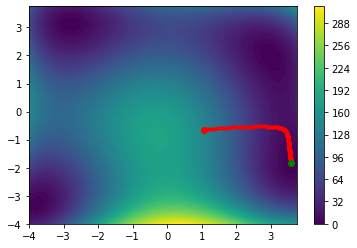

In [0]:
# Grafica de la funcion

plt.contourf(X,Y,F_cost([X,Y]),100)
plt.colorbar()

# Punto Inicial
Theta = np.random.rand(2) * 4 - 2  

#Grafica de Punto Inicial
plt.plot(Theta[0],Theta[1],"o",c="red") 

Theta_ = np.copy(Theta)

h = 0.00001 # Aproximacion diferencial
lr = 0.00001 # learning rate

# Espacio a ingresar la gradiente en el punto
grad = np.zeros(2) 

for ip in range(10000):
  for i,th in enumerate(Theta):    # determinamos la gradiente por la tecnica de aproximacion 
    Theta_ = np.copy(Theta)
    Theta_[i] = Theta_[i] + h
    der = (F_cost(Theta_)-F_cost(Theta))/h 
    grad[i] = der
  Theta = Theta - lr*grad
  #print(F_cost(Theta))
  if(ip % 10 == 0): # por cada 100 iteracion modulo sale 0 
    plt.plot(Theta[0],Theta[1],".",c="red")
print(F_cost(Theta))
plt.plot(Theta[0],Theta[1],"o",c="green") # punto final
plt.show()